# Самостоятельная работа №2

## Часть 1

In [8]:
m <- matrix(3, 3, 4)
m

m[1, 3] <- 4
m[2, 1] <- 1
m[3, 2] <- NA
m[dim(m)[1], dim(m)[2]] <- 1
m

3,3,3,3
3,3,3,3
3,3,3,3


3,3,4,3
1,3,3,3
3,NA,3,1


In [10]:
a <- c(1, 3, 4, 9, NA)
b <- c(5, 6, 7, 0, 2)
c  <- c(9, 10, 13, 1, 20)

m <- cbind(a, b, c)
m

m <- rbind(a, b, c)
m

rownames(m) <- c("first", "second", "third")
colnames(m) <- sapply(1:dim(m)[2], as.character)
m

a,b,c
1,5,9
3,6,10
4,7,13
9,0,1
NA,2,20


a,1,3,4,9,NA
b,5,6,7,0,2
c,9,10,13,1,20


,1,2,3,4,5
first,1,3,4,9,NA
second,5,6,7,0,2
third,9,10,13,1,20


In [12]:
names <- c("Jane", "Michael", "Mary", "George")
ages <- c(8, 6, 28, 45)
gender <- c(0, 1, 0, 1)

m <- cbind(names, ages, gender)
m

age_sq <- sapply(ages, function (x) x^2)
m <- cbind(m, age_sq)

m

names,ages,gender
Jane,8,0
Michael,6,1
Mary,28,0
George,45,1


names,ages,gender,age_sq
Jane,8,0,64
Michael,6,1,36
Mary,28,0,784
George,45,1,2025


## Часть 2

In [13]:
A <- diag(c(4, 9))
A

rownames(A) <- sapply(1:dim(A)[1], function(x) { paste0("eq", as.character(x)) })
colnames(A) <- sapply(1:dim(A)[1], function(x) { paste0("x", as.character(x)) })
A

4,0
0,9


,x1,x2
eq1,4,0
eq2,0,9


In [14]:
values <- eigen(A, only.values=TRUE)
values$values

[1] 9 4

In [15]:
B <- diag(c(1, 1)) - A
B

,x1,x2
eq1,-3,0
eq2,0,-8


In [17]:
f <- c(4, 2)
u <- c(0.2, -0.3)

In [18]:
u_result <- solve(A) %*% f
u_result

x1,1.0000000
x2,0.2222222


In [20]:
U <- matrix(0, 7, 2)

U[1,] <- values$values

for (i in 2:7) {
    U[i,] <- B %*% U[i - 1,] + f
}

U

9,4
-23,-30
73,242
-215,-1934
649,15474
-1943,-123790
5833,990322


In [22]:
u_result - U[dim(U)[1],]

x1,-5832.0
x2,-990321.8


In [23]:
f <- f / max(A)
f
A <- A / max(A)
A

[1] 0.4444444 0.2222222

,x1,x2
eq1,0.4444444,0
eq2,0.0000000,1


In [24]:
values <- eigen(A, only.values=TRUE)

B <- diag(c(1, 1)) - A

u_result <- solve(A) %*% f

U <- matrix(0, 7, 2)
U[1,] <- values$values

for (i in 2:7) {
    U[i,] <- B %*% U[i - 1,] + f
}

u_result - U[dim(U)[1],]

x1,0
x2,0


# Часть 3

In [26]:
step <- 1
dekart_begin <- -5
dekart_end <- 5

x <- seq(from=dekart_begin, to=dekart_end, by=step)
y <- x

surface_matrix <- outer(X = x, 
                        Y = y, 
                        FUN = function(x,y) Re(exp(-1i * 0.5  * x * y)))
dimnames(surface_matrix) <- list(x, y)

In [27]:
describe <- function(matr, filename="data/practice2/summary.txt", ...) {
    write("number of matrix elements:", filename)
    write(dim(matr)[1] * dim(matr)[2], filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("number of rows:", filename, append=TRUE)
    write(dim(matr)[1], filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("number of cols:", filename, append=TRUE)
    write(dim(matr)[2], filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("sum of main diag elements:", filename, append=TRUE)
    write(sum(diag(matr)), filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("sum of middle row elements:", filename, append=TRUE)
    write(sum(matr[ceiling(dim(matr)[1] / 2), ]), filename, append=TRUE)
    write("\n", filename, append=TRUE)

    write("sum of middle column elements:", filename, append=TRUE)
    write(sum(matr[ceiling(dim(matr)[2] / 2), ]), filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("row sums:", filename, append=TRUE)
    sums <- sapply(1:dim(matr)[1], function(x) return(sum(matr[x, ])))
    write(sums, filename, append=TRUE)
    write("\n", filename, append=TRUE)
                 
    write("col sums:", filename, append=TRUE)
    sums <- sapply(1:dim(matr)[1], function(x) return(sum(matr[x, ])))
    write(sums, filename, append=TRUE)
    write("\n", filename, append=TRUE)
}

describe(surface_matrix)

In [28]:
describe <- function(matr, filename="data/practice2/summary1.txt", ...) {
    write("number of matrix elements:", filename)    
    write(dim(matr)[1] * dim(matr)[2], filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("number of rows:", filename, append=TRUE)
    write(dim(matr)[1], filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("number of cols:", filename, append=TRUE)
    write(dim(matr)[2], filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("sum of main diag elements:", filename, append=TRUE)
    write(sum(diag(matr)), filename, append=TRUE)
    write("\n", filename, append=TRUE)
    
    write("row sums:", filename, append=TRUE)
    sums <- sapply(1:dim(matr)[1], function(x) return(sum(matr[x, ])))
    write(sums, filename, append=TRUE)
    write("\n", filename, append=TRUE)
                 
    write("col sums:", filename, append=TRUE)
    sums <- sapply(1:dim(matr)[1], function(x) return(sum(matr[x, ])))
    write(sums, filename, append=TRUE)
    write("\n", filename, append=TRUE)
}

x <- seq(from=dekart_begin, to=dekart_end, by=step)
y <- x

surface_matrix <- outer(X = x, 
                        Y = y, 
                        FUN = function(x,y) Re(exp(-1i * 0.5  * x * y)))
dimnames(surface_matrix) <- list(x, y)

describe(surface_matrix, "data/practice2/summary2.txt", FALSE)

In [30]:
file <- read.table("data/practice2/input.txt")

step <- as.integer(file[1, ])
dekart_begin <- as.integer(file[2, ])
dekart_end <- as.integer(file[3, ])

x <- seq(from=dekart_begin, to=dekart_end, by=step)

step <- as.integer(file[4, ])
dekart_begin <- as.integer(file[5, ])
dekart_end <- as.integer(file[6, ])

y <- seq(from=dekart_begin, to=dekart_end, by=step)

surface_matrix <- outer(X = x, 
                        Y = y, 
                        FUN = function(x,y) Re(exp(-1i * 0.5  * x * y)))
dimnames(surface_matrix) <- list(x, y)

describe(surface_matrix, "data/practice2/summary3.txt")

## Часть 4

In [31]:
cars_matrix <- as.matrix(cars)

In [32]:
cars_speed <- cbind(rep(c(1), length(cars_matrix[, 1])), cars_matrix[, 1])

In [33]:
cars_dist <- cars_matrix[, 2]

In [34]:
alpha <- solve(t(cars_speed) %*% cars_speed) %*% t(cars_speed) %*% cars_dist

In [35]:
typeof(alpha)
alpha <- as.vector(alpha)

[1] "double"

In [37]:
alpha_c = alpha[1]
alpha_x = alpha[2]

cat("alpha_c = ", alpha_c, "\nalpha_x = ", alpha_x)

alpha_c =  -17.57909 
alpha_x =  3.932409

In [38]:
cars_speed_lm <- cars_matrix[, 1]

In [39]:
cars_dist_lm <- alpha_c + cars_speed_lm * alpha_x

In [40]:
dist_residuals <- cars_dist_lm - cars_dist

In [41]:
cat("Среднее отклонение - ", mean(dist_residuals))
cat("\n")
cat("Стандартное отклонение - ", sd(dist_residuals))

Среднее отклонение -  -1.069367e-13
Стандартное отклонение -  15.22184

In [42]:
cars_dist_lm

[1] -1.849460 -1.849460  9.947766  9.947766 13.880175 17.812584 21.744993
 [8] 21.744993 21.744993 25.677401 25.677401 29.609810 29.609810 29.609810
[15] 29.609810 33.542219 33.542219 33.542219 33.542219 37.474628 37.474628
[22] 37.474628 37.474628 41.407036 41.407036 41.407036 45.339445 45.339445
[29] 49.271854 49.271854 49.271854 53.204263 53.204263 53.204263 53.204263
[36] 57.136672 57.136672 57.136672 61.069080 61.069080 61.069080 61.069080
[43] 61.069080 68.933898 72.866307 76.798715 76.798715 76.798715 76.798715
[50] 80.731124

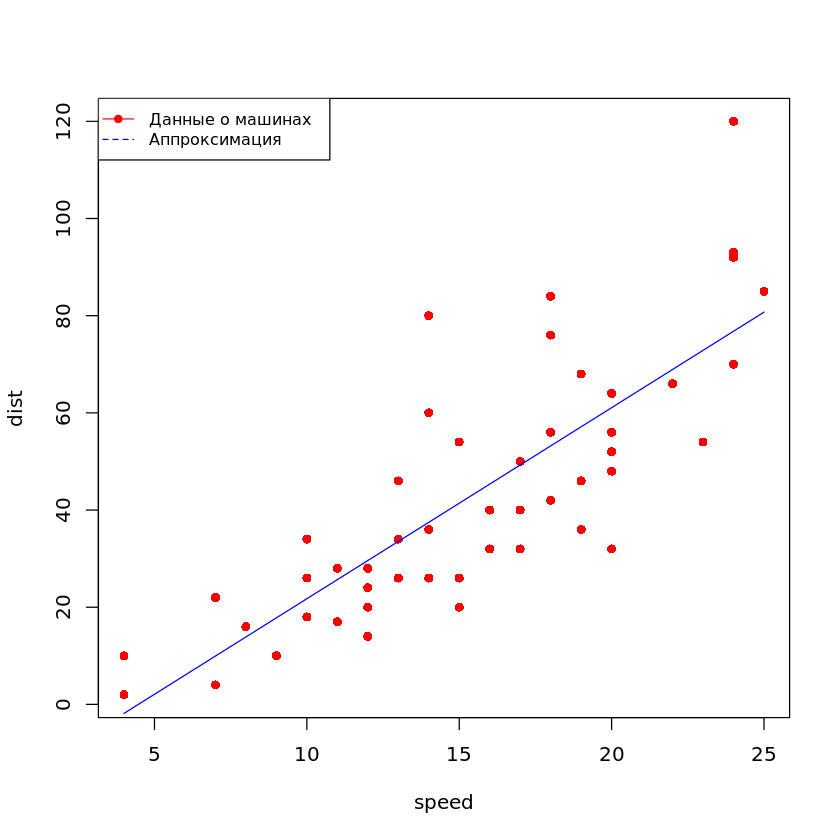

In [43]:
plot(cars_matrix[, 1], cars_matrix[, 2], xlab="speed", ylab="dist", col="red", pch=16)

lines(cars_speed_lm, cars_dist_lm, col="blue")

legend("topleft", legend=c("Данные о машинах", "Аппроксимация"), col=c("red", "blue"), lty = 1:2, cex=0.8, pch=c(19, -1))